In [1]:
# Paul-Jason Mello
# Professor Shim
# CMPE 257
# March 25th, 2022

# XGboost

## 1. What is boosting?

In [2]:
# Boosting is an ensemble method which offers us the ability to pool together many weak classifiers. We assign
# significant weights to missclassified data and attempt to retrain on just the misslassified data. Boosting 
# is a very useful techinique which can help reduce the bias and variance in our model. There are many
# different boosting algorithms being used today. 

## 2. Explain the following three models: Adaboost, Gradient boost and XGboost (also discuss their similarities and differences)

In [3]:
# Adaboost
# 
# Adaboost is an ensemble method where classifiers are weighted equally and over time higher weights are
# assigned to missclassified variables. In Adaboost we build short decision trees, stumps, and add them 
# together sequentially. This turns the weak classifiers from stumps into strong classifiers. 

# Gradient Boost
# 
# Gradient boost is an ensemble method where the classifiers are weighted precisely. We identify the error
# and adjust our model based on the current gradient.  

# XGBoost
# 
# XGBoost is an improved gradient boost. The idea is to build trees in parallel. As we model more trees we
# adjust the weights of missclassified and classified data to their extremes. In this way we build an ensemble
# method which continues to predict and perform more efficently than gradient boost.

# Similarities
#
# In all of these instances they are ensemble methods which attempt to turn a weak classifier into a 
# strong one. They all appear to use decision trees as a means of immediate classification.

# Differences
#
# The elements of parallel and sequential computing stand out as a major difference. Another is the way in 
# which we decide to update our weights. It's interesting to see how parallelization can have such a profound
# impact on performance.

## 3. what is a Dmatrix? 

In [4]:
# From my limited understanding of a Dmatrix, I believe that it is responsible for updating the weights of
# xgboost. This is what makes xgboost so powerful, as the weights are updated through a hessian matrix. This
# provides an increase in the training efficency of xgboost.

## 4. Load the dataset attached with this HW (wholesale)

In [5]:
# !pip install xgboost

In [6]:
import pandas as pd
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score

sns.set(rc={"figure.figsize":(15, 15)})

In [7]:
data = pd.read_csv("wholesale-data.csv") 
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [8]:
print(data.nunique())

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64


In [9]:
print(data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [10]:
# Our Data set is marginally imbalanced.

for x in data:
    print(str(pd.crosstab(data[x], data.Channel)) + "\n")

Channel    1    2
Channel          
1        298    0
2          0  142

Channel    1    2
Region           
1         59   18
2         28   19
3        211  105

Channel  1  2
Fresh        
3        2  0
9        1  0
18       0  1
23       0  1
37       0  1
...     .. ..
56083    1  0
56159    1  0
68951    1  0
76237    1  0
112151   1  0

[433 rows x 2 columns]

Channel  1  2
Milk         
55       1  0
112      1  0
134      1  0
201      1  0
254      1  0
...     .. ..
38369    0  1
43950    1  0
46197    0  1
54259    0  1
73498    0  1

[421 rows x 2 columns]

Channel  1  2
Grocery      
3        1  0
137      1  0
218      1  0
223      1  0
245      1  0
...     .. ..
45828    0  1
55571    0  1
59598    0  1
67298    0  1
92780    0  1

[430 rows x 2 columns]

Channel  1  2
Frozen       
25       1  0
33       0  1
36       0  1
38       0  1
42       0  1
...     .. ..
18028    1  0
18711    1  0
35009    1  0
36534    1  0
60869    1  0

[426 rows x 2 columns]

Channel 

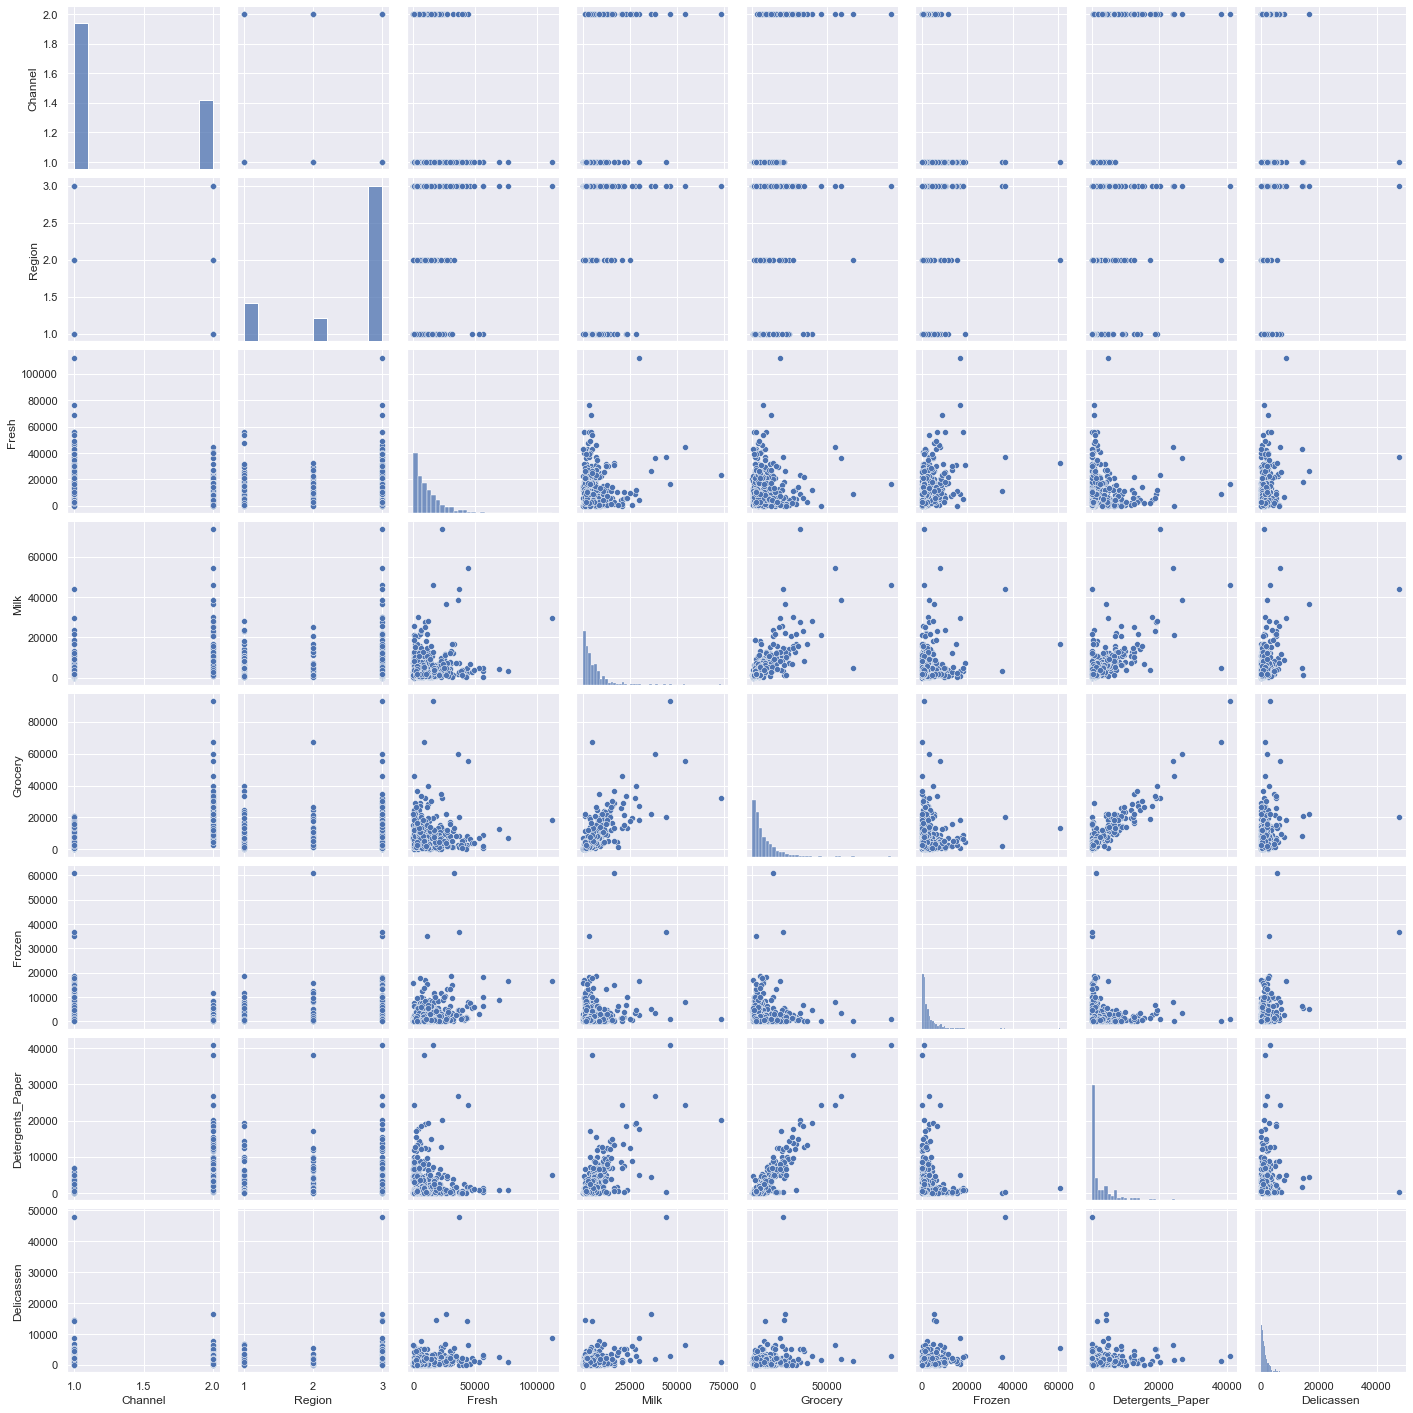

In [11]:
sns.pairplot(data)

<AxesSubplot:>

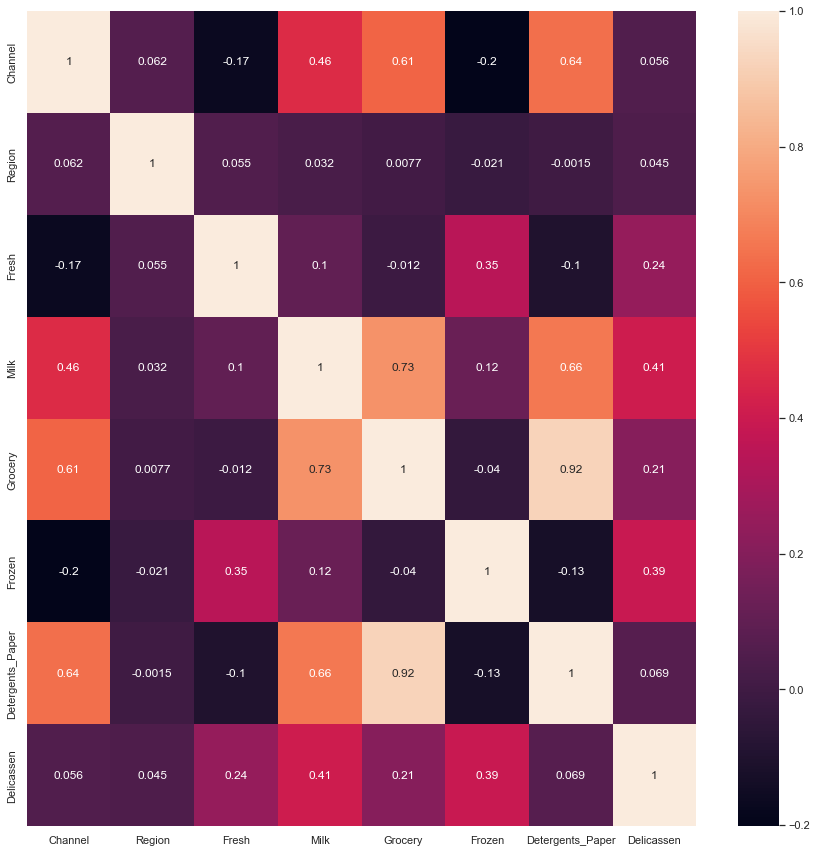

In [12]:
sns.heatmap(data.corr(), annot = True)

In [13]:
x, y = data.drop(['Channel'], axis=1), data['Channel'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

## 5. Change the dataset into a dmatrix

In [15]:
DMat = xgb.DMatrix(x,y)

In [16]:
DMat

## 6. What is an imbalanced dataset?

In [17]:
# Imbalanced data is used to refer to a data set which has an high amount of one data type. When training a 
# model on unbalanced data our model, and subsequent predictions, become biased towards a given target. As a
# result, it is important to fix any datasets which are highly imbalanced. Specifically, imbalanced data 
# should only be accounted for when our data is significantly imbalanced. This can help train a model to 
# properly generalize an answer as opposed to memorizing the imbalanced data distribution it was trained on.

## 6. perform classification with "channel" as the target variable and XGBoost as the model

In [18]:
param_grid = {
    "learning_rate": [0.1, 0.01, 0.001],
    "scale_pos_weight": [5, 7, 10],
    "subsample": [0.8],
    "gamma": [0.1, 1],
    "reg_lambda": [0, 1, 5],
    "max_depth": [4, 5, 6]
}

In [19]:
xgbModel = xgb.XGBClassifier()

gridXGB = GridSearchCV(xgbModel, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
model = gridXGB.fit(x, y)

[18:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\GIGA\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [20]:
print("Best Parameters")
print(model.best_params_)

Best Parameters
{'gamma': 1, 'learning_rate': 0.01, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 10, 'subsample': 0.8}


In [21]:
bestParams = model.best_params_ # {'gamma': 1, 'learning_rate': 0.01, 'max_depth': 5, 
                                  # 'reg_lambda': 0, 'scale_pos_weight': 10, 'subsample': 0.8}
xgbModel = xgb.XGBClassifier(gamma = 1, learning_rate = 0.01,
                           max_depth = 5, reg_lambda = 0, 
                           scale_pos_weight = 10, subsample = .8)

In [22]:
xgbModel.fit(X_train, y_train, eval_metric = "rmsle")
y_pred = xgbModel.predict(X_test)

## 7. Evaluate the model using accuracy, f1 score, AUROC and AUPRC and explain which one is the best evaluation metric for this model and why?

In [23]:
print("Accuracy")
print(accuracy_score(y_test, y_pred))

Accuracy
0.8712121212121212


In [24]:
print("F1 Score")
print(f1_score(y_test, y_pred))

F1 Score
0.8957055214723927


In [25]:
print("AUROC")
print(roc_auc_score(y_test, y_pred))

AUROC
0.8809403437815975


In [26]:
print("AUPRC")
print(average_precision_score(y_test, y_pred))

AUPRC
0.5887596899224805


In [27]:
# Accuracy: (TP + TN) / (TP + TN + FP + FN) = Accuracy
# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
# AUROC: TPR:FPR
# AUPRC: Precision:Recall

In [28]:
# I believe the best metric to use here is F1 Score as it can handle imbalanced data the best. Another reason
# is because the next best class would be AUPRC but AUPRC puts too much emphasis on the positive class. With
# a nearly 60% accuracy rate its clear that our other models, all above 87%, would be far better evalutation
# metrics than AUPRC.